In [1]:
import sklearn
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline 

### Ćwiczenie 1 (1 pkt)
    a) znajdź największą i najmniejszą wartość w wektorze c. 
    b) stworzyć analogicznie wektor d i policzyć iloczyn skalarny. Ile wynosi jak zwiększymy ilość wymiarów?

In [2]:
c = np.random.uniform(size=(5,))
d = np.random.uniform(size=(5,)) 
e = np.random.uniform(size=(1000,))
f = np.random.uniform(size=(1000,))
c_max = np.max(c)
c_min = np.min(c)
inner_product_cd = np.inner(c,d)


print("c = {0}".format(c))
print("minimalny element c = {0}".format(c_min))
print( "maksymalny element c = {0}".format(c_max))
print("d = {0}".format(d))
print("iloczyn skalarny c i d = {0}".format(inner_product_cd))


e = e/sum(e)
f = f/sum(f)

inner_product_ef = np.inner(e,f)
print("iloczyn skalarny unormowanych 1000-wymiarowych wektorow: {0}".format(inner_product_ef))
print("Iloczyn jest bardzo mały. Interpretacja: losowe dwa wielowymiarowe wektory są niemal prostopadłe.")

c = [ 0.83911691  0.23470343  0.60029219  0.30300866  0.02091696]
minimalny element c = 0.0209169556069585
maksymalny element c = 0.8391169080740055
d = [ 0.7323202   0.23277892  0.83996636  0.63871197  0.5124902 ]
iloczyn skalarny c i d = 1.3776165099537123
iloczyn skalarny unormowanych 1000-wymiarowych wektorow: 0.0010128844831092977
Iloczyn jest bardzo mały. Interpretacja: losowe dwa wielowymiarowe wektory są niemal prostopadłe.


## Ćwiczenie 2 (1 pkt)

Prosze narysowac wylosowac 100 punktow z np.random.uniform z 2 wspolrzednymi i narysowac za pomoc plt.scatter

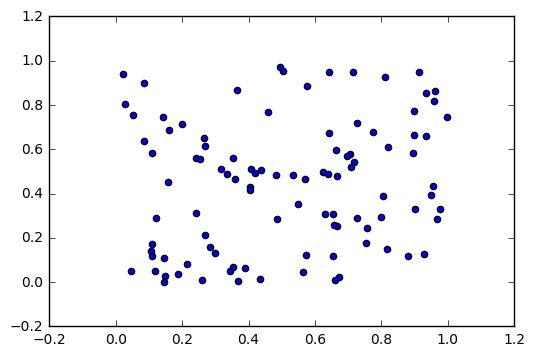

In [3]:
samples = np.random.uniform(size=(2,100))
plt.scatter(samples[0], samples[1]) 

### Cwiczenie 3 (1 pkt): 
    a) Jaka jest średnia długość płatka w zbiorze danych? (pierwsza cecha przykładu, podpowiedź: macierz przykładów jest w iris.data). 
    b) Narysuj histogram długości płatka (plt.hist)

średnia dłogość płatka: 5.843333333333334


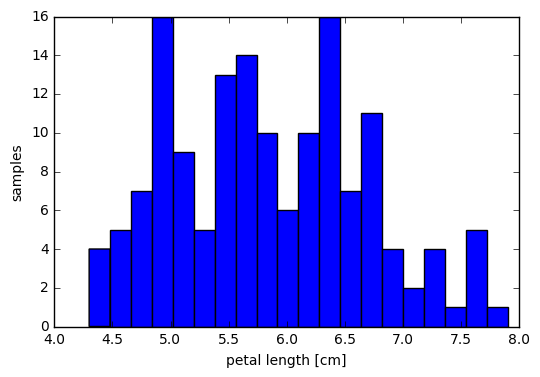

In [4]:
iris = load_iris()
petal_lengths = iris['data'].T[0]

print("średnia dłogość płatka: {0}".format(np.mean(petal_lengths)))

_ = plt.hist(petal_lengths, bins = 20)
_ = plt.ylabel("samples")
_ = plt.xlabel("petal length [cm]")

### Ćwiczenie 5 (1 pkt): 
    a) We wcześniejszym przykładzie narysowałem wykres na podstawie 1 i 2 cechy (2 z 4 cech). Proszę sprawdzić czy jakaś inna kombinacja cech poprawia separowalność przykładów (łatwiej je oddzielić kreską)

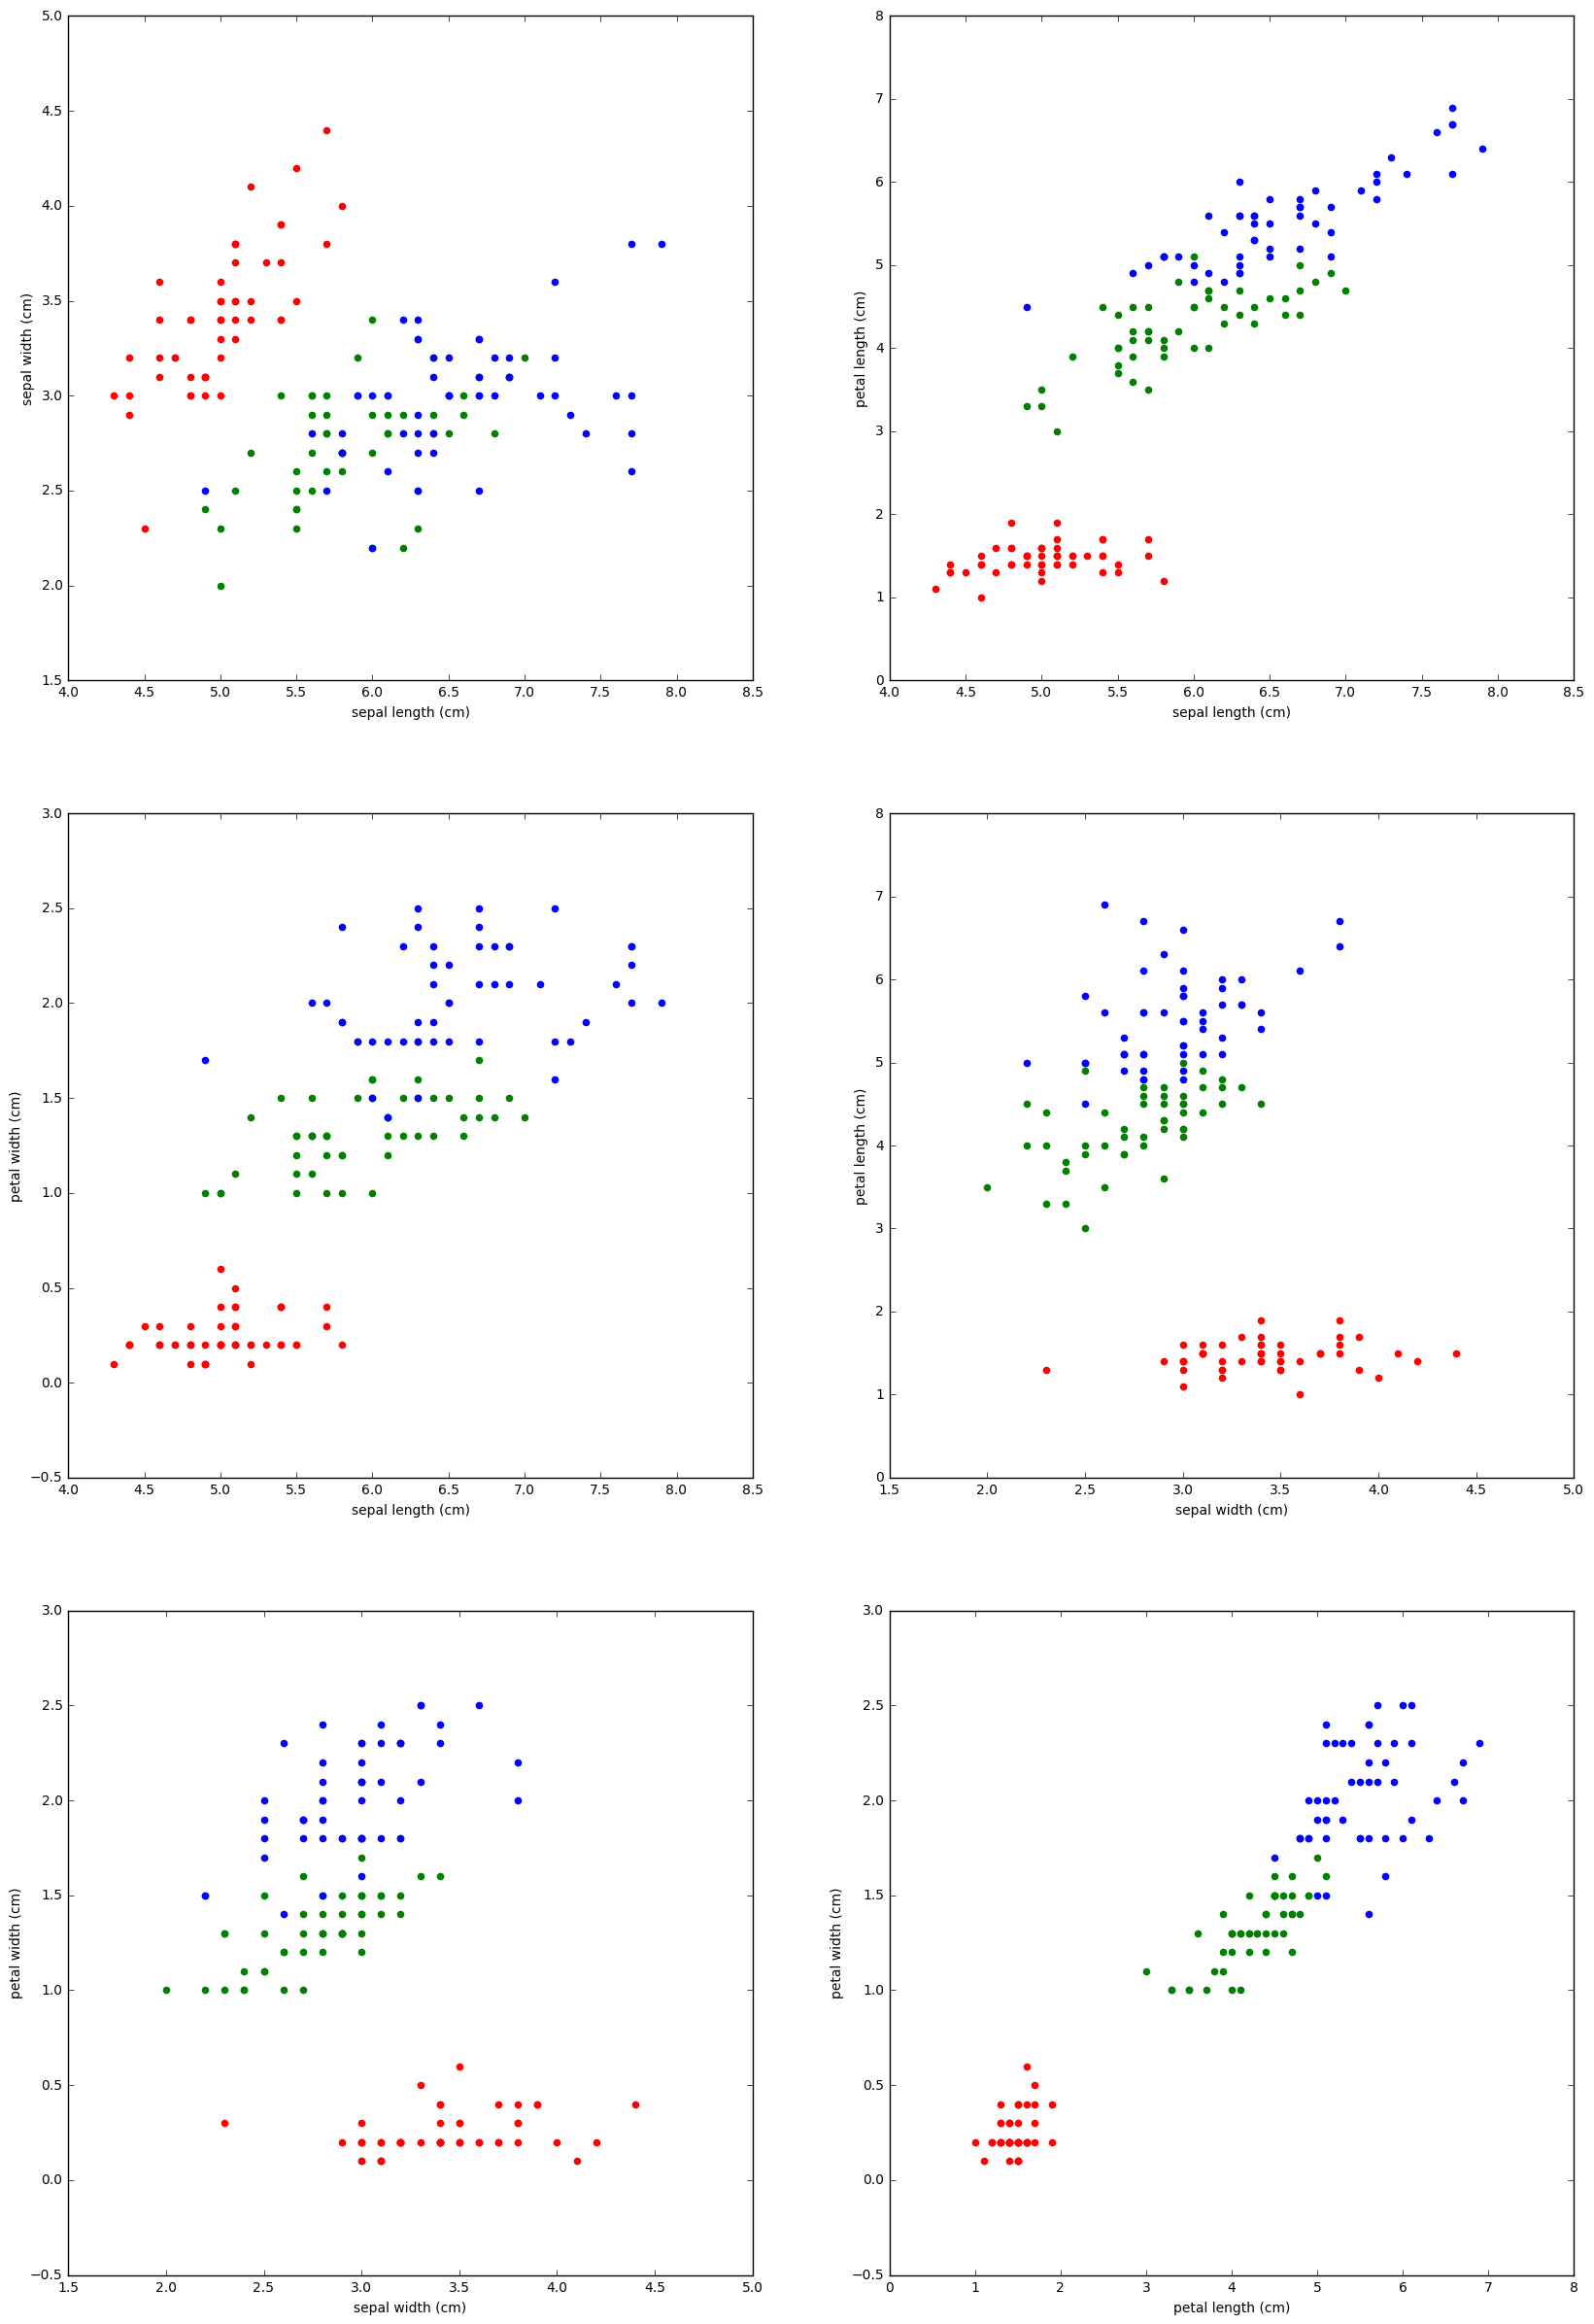

In [5]:
plt.figure(figsize=(20,30))
counter = 1

for i in range(4):
    for j in range(i+1,4):
        plt.subplot(3, 2, counter)
        plt.scatter(iris.data[iris['target']==0, i], iris.data[iris['target']==0, j], color='r')
        plt.scatter(iris.data[iris['target']==1, i], iris.data[iris['target']==1, j], color='g')
        plt.scatter(iris.data[iris['target']==2, i], iris.data[iris['target']==2, j], color='b')
        plt.xlabel(iris['feature_names'][i])
        plt.ylabel(iris['feature_names'][j])
        counter += 1

## Wydaje się, że każda inna kombinacja poprawia separowalność, jednak żadna z nich nie daje idealnej separowalności.

-----

### Ćwiczenie 6 (2 pkt)

Zaprogramuj funkcje predict() ktora bedzie zwracac to co pierwszy_model.predict. Funkcja powinna przejsc testy i implementowac nastepujacy interfejs

In [6]:
iris = load_iris()
X,Y = iris.data[:,0:2], iris.target
Y = Y==0

pierwszy_model = LinearSVC() 
_= pierwszy_model.fit(X, Y) 


def predict(z):
    if pierwszy_model.coef_[0][0] * z[0] + pierwszy_model.coef_[0][1] * z[1]  + pierwszy_model.intercept_[0] >= 0:
        return [True]
    else:
        return [False]

In [7]:
for x in np.linspace(-1, 1, 10):
    for y in np.linspace(-1, 1, 10):
        assert pierwszy_model.predict([[x, y]]) == predict([x, y]), "Failed on {},{}".format(x, y)

# Cwiczenie 7 (2 pkt) 

1. Znalezc C ktore na X_test, Y_test ma 100%. 
2. Narysowac wykres, na osi X wartosc C, na osi Y dokladnosc dla danego C

100% accuracy achieved for C=4.2


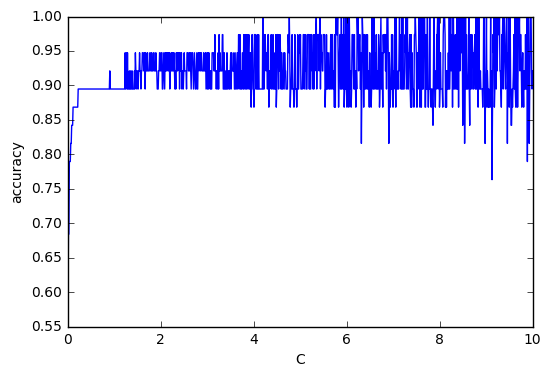

In [8]:
iris = load_iris()
X,Y = iris.data, iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

accuracy_arr = []
perfect_found = False

for proposed_C in np.linspace(0.01,10, 1000):
    proposed_model = LinearSVC(C=proposed_C) 
    proposed_model.fit(X_train, Y_train)
    Y_test_predicted = proposed_model.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)
    accuracy_arr.append(accuracy)
    if accuracy == 1 and not perfect_found:
        print("100% accuracy achieved for C={0}".format(proposed_C))
        perfect_found = True
    
    
_ = plt.plot(np.linspace(0.01,10, 1000), accuracy_arr)
_ = plt.ylabel("accuracy")
_ = plt.xlabel("C")